In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

#-----------------------------------------------------------------------

 #select random points
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
   
    for i in range(k):
        
        centroids[i,:] = X[idx[i],:]
   
    return centroids


# centroid function
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
   
   
    for i in range(m):
        min_dist = 1000000#suppose  min_dist =1000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
   
    return idx

# centroid maker(deplecment centriod"select new cetriod")
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
   
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
   
    return centroids

# k means function
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
   
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
   
    return idx, centroids


In [8]:

#we need to compress the image 
image_data = loadmat('C:\\machine learning\\data\\unsupervised\\bird_small.mat')
print(image_data)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Nov 29 23:36:07 2011', '__version__': '1.0', '__globals__': [], 'A': array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  

(128, 128, 3)


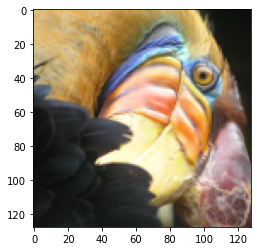

In [9]:
A = image_data['A']
print(A.shape)
plt.imshow(A)


In [10]:
#normalize value ranges
A = A / 255 #color 256 


In [11]:
#reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print(X.shape)


(16384, 3)


In [12]:
#randomly initialize the centroids
initial_centroids = init_centroids(X, 16)
print(initial_centroids)


[[0.87843137 0.81176471 0.56470588]
 [0.79215686 0.69803922 0.49019608]
 [0.72156863 0.54509804 0.25882353]
 [0.39607843 0.25490196 0.09019608]
 [0.8        0.73333333 0.56078431]
 [0.11372549 0.11372549 0.10196078]
 [0.70588235 0.50588235 0.22745098]
 [0.8745098  0.7372549  0.78039216]
 [0.12156863 0.13333333 0.1254902 ]
 [0.88235294 0.69411765 0.38823529]
 [0.51764706 0.75294118 0.74117647]
 [0.50980392 0.41960784 0.27843137]
 [0.68627451 0.6        0.41176471]
 [0.08235294 0.09803922 0.08235294]
 [0.98039216 1.         0.81568627]
 [0.14901961 0.1372549  0.15686275]]


In [13]:
# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)


In [14]:
# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)


In [15]:
# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]


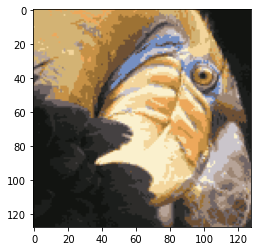

In [16]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered)